> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Investigating TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
TMDb movies dataset
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue,cast,release year. It consist of 21 columns such as imdb_id, revenue, budget, vote_count etc.

#### In this report, I will exploar the folowing questions:
1. make group for each year and count the number of movies in each year
2. Which Movie Has The Highest Or Lowest Profit?
3. Movie with Highest And Lowest Budget?
4. 

In [2]:
# Importing packages that I plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

# import IPython
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>  After observing the dataset and proposed questions for the analysis we will be keeping only relevent data deleting the unsued data so that we can make our calculation easy and understandable.

### General Properties

In [4]:
# First, Load the data and print out a few lines. 
dfc = pd.read_csv('tmdb_5000_credits.csv')
dfm = pd.read_csv('tmdb_5000_movies.csv')

df = pd.merge(dfc, dfm)

#### Brief Description of each column in the dataset
    1.id - Unique id's for each row
    2.imdb_id - System generated unique id
    3.popularity - popularity score
    4.budget - budget in dollars
    5. revenue - revenue in dollars
    6.original_title - Movie title
    7.cast - cast performed in movie
    8.homepage - website link of movie
    9.director - director name
    10.tagline - tagline of movie
    11.keywords - words used to give significant idea
    12.overview - general review of movie
    13.runtime - movie duration in minutes
    14.genres - categories of movie
    15.production_companies - company name which manages a movie process from start to finish
    16.release_date - movie releasing date
    17.vote_count - votes given by viewers
    18.vote_average - average votes given by viewers
    19.release_year - movie releasing year
    20.budget_adj-budget in 2010 dollars,accounting for inflation
    21.revenue_adj -revenue in 2010 dollars,accounting for inflation

In [5]:
#   Perform operations to inspect data types and look for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_id              4809 non-null   int64  
 1   title                 4809 non-null   object 
 2   cast                  4809 non-null   object 
 3   crew                  4809 non-null   object 
 4   budget                4809 non-null   int64  
 5   genres                4809 non-null   object 
 6   homepage              1713 non-null   object 
 7   id                    4809 non-null   int64  
 8   keywords              4809 non-null   object 
 9   original_language     4809 non-null   object 
 10  original_title        4809 non-null   object 
 11  overview              4806 non-null   object 
 12  popularity            4809 non-null   float64
 13  production_companies  4809 non-null   object 
 14  production_countries  4809 non-null   object 
 15  release_date         

In [6]:
# first two rows of the dataset
df.head(2)

,movie_id,title,cast,crew,budget,genres,homepage,id,keywords,original_language,...,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500


In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.isnull().sum()

movie_id                   0
title                      0
cast                       0
crew                       0
budget                     0
genres                     0
homepage                3096
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
vote_average               0
vote_count                 0
dtype: int64

`homepage` has 3096 missing values, `tagline` has 844

In [12]:
# filling the null values with zeros
df.fillna(0)

,movie_id,title,cast,crew,budget,genres,homepage,id,keywords,original_language,...,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",0,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",6.6,238
4805,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",0,72766,[],en,...,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,5.9,5

**Obsevations from the data set**

1.) No unit of currency is mentioned in the dataset as forthe cost of each film. So for my analysis I will take it as $ as it is the most used international currency.

2.) `vote_count` is different for all the movies, so we cannot directly conculed the popularity of the movies based on the average vote count

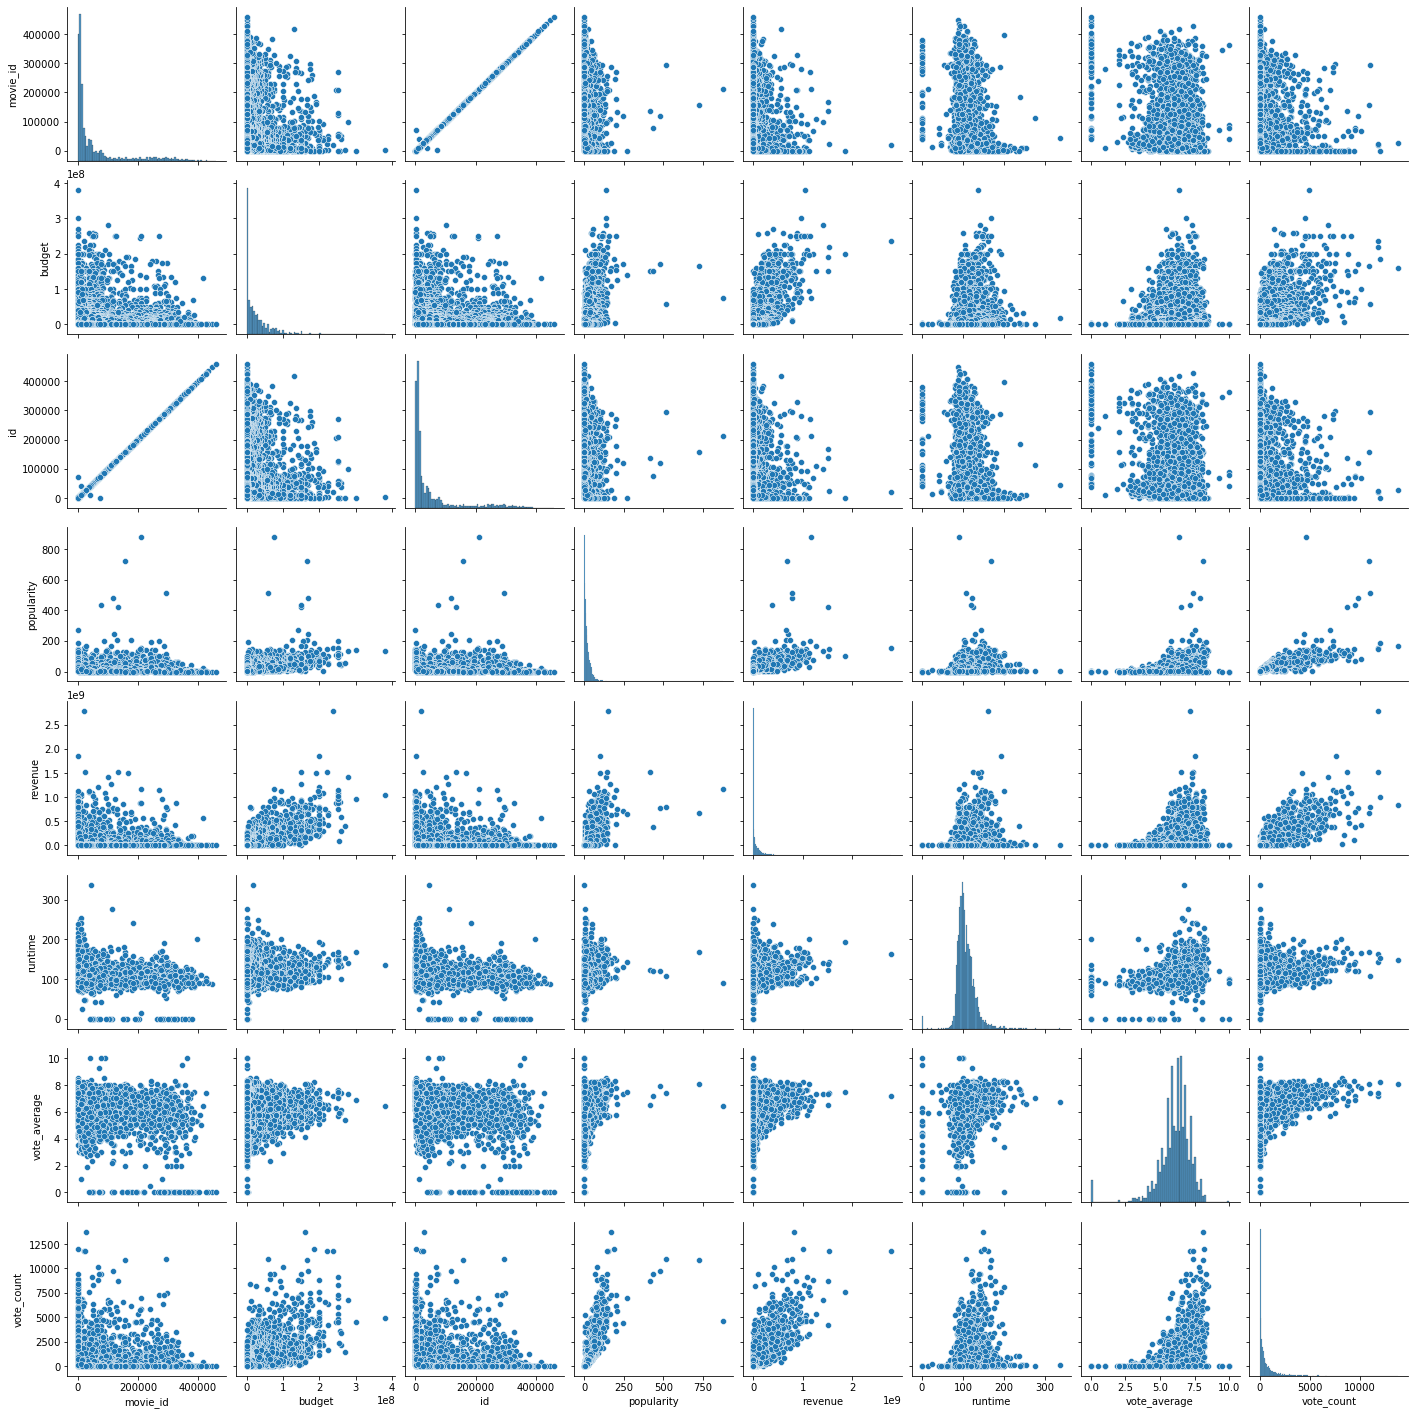

In [10]:
sns.pairplot(df);

In [11]:
df.info(),
print('-------------')
print('Dataframe contains {} rows and {} columns'.format(df.shape[0],df.shape[1]))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_id              4809 non-null   int64  
 1   title                 4809 non-null   object 
 2   cast                  4809 non-null   object 
 3   crew                  4809 non-null   object 
 4   budget                4809 non-null   int64  
 5   genres                4809 non-null   object 
 6   homepage              1713 non-null   object 
 7   id                    4809 non-null   int64  
 8   keywords              4809 non-null   object 
 9   original_language     4809 non-null   object 
 10  original_title        4809 non-null   object 
 11  overview              4806 non-null   object 
 12  popularity            4809 non-null   float64
 13  production_companies  4809 non-null   object 
 14  production_countries  4809 non-null   object 
 15  release_date         

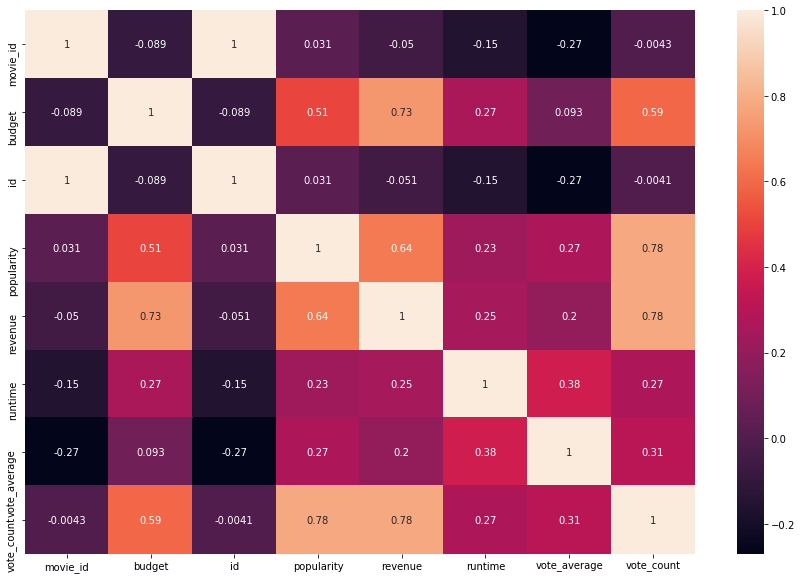

In [13]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), ax=ax, annot=True);

In [14]:
df['budget'].replace(0, np.NAN, inplace=True)
df['runtime'].replace(0, np.NAN, inplace=True)

df.dropna(axis=0, inplace=True)

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [15]:
# After discussing the structure of the data and any problems that need to be
# cleaned, perform those cleaning steps in the second part of this section.

df.head()
## delete unused columns
# del df['revenue']
# del df['id']
# del df['homepage']
# del df['crew']

,movie_id,title,cast,crew,budget,genres,homepage,id,keywords,original_language,...,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124


In [16]:
# # After discussing the structure of the data and any problems that need to be
# #   cleaned, perform those cleaning steps in the second part of this section
# #we can see that 21 columns in the dataset, We can drop them using drop function.
# df.drop(['budget_adj','revenue_adj','overview','imdb_id','homepage','tagline'],axis =1,inplace = True)
# print("Afetr Removing Unused Columns (Rows,Columns) : ",df.shape)

**1. Removing Unused columns**
Columns that we need to delete are - `id`, `imdb_id`, `popularity`, `budget_adj`, `revenue_adj`, `homepage`, `keywords`, `overview`, `production_companies`, `vote_count` and `vote_average`.

In [31]:
rows, col = df.shape
#We need to reduce the count of row by one as contain header row also.
print('There are {} total entries of movies and {} no.of columns in it.'.format(rows-1, col))

There are 1342 total entries of movies and 25 no.of columns in it.


In [32]:
# Now removing the duplicate rows if any
df.drop_duplicates(keep ='first', inplace=True)
rows, col = df.shape

print('There are now {} total entries of movies and {} no.of columns in it.'.format(rows-1, col))

There are now 1342 total entries of movies and 25 no.of columns in it.


In [33]:
# Removing 0's from budget and the revenue columns
# creating a seperate list of revenue and budget column
temp_list=['budget', 'revenue']

#this will replace all the value from '0' to NAN in the list
df[temp_list] = df[temp_list].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
df.dropna(subset = temp_list, inplace = True)

rows, col = df.shape
print('So after removing such entries, we now have only {} no.of movies.'.format(rows-1))

So after removing such entries, we now have only 1249 no.of movies.


In [35]:
# Replacing zero with NAN in runtime column.

df.release_date = pd.to_datetime(df['release_date'])

In [36]:
#printing the data type of the data set
df.dtypes

movie_id                         int64
title                           object
cast                            object
crew                            object
budget                         float64
genres                          object
homepage                        object
id                               int64
keywords                        object
original_language               object
original_title                  object
overview                        object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                        float64
runtime                        float64
spoken_languages                object
status                          object
tagline                         object
vote_average                   float64
vote_count                       int64
release_year                     int64
Profit                         float64
dtype: object

In [37]:
# Changing format of budget and revenue column.
change_type=['budget', 'revenue']
#changing data type
df[change_type]=df[change_type].applymap(np.int64)
#printing the changed information
df.dtypes

movie_id                         int64
title                           object
cast                            object
crew                            object
budget                           int64
genres                          object
homepage                        object
id                               int64
keywords                        object
original_language               object
original_title                  object
overview                        object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
status                          object
tagline                         object
vote_average                   float64
vote_count                       int64
release_year                     int64
Profit                         float64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.


#### Calculating the profit of the each movie

In [38]:
#insert function with three parameters(index of the column in the dataset, name of the column, value to be inserted)
df.insert(2,'profit_earned',df['revenue']-df['budget'])

#previewing the changes in the dataset
df.head(2)

,movie_id,title,profit_earned,cast,crew,budget,genres,homepage,id,keywords,...,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,release_year,Profit
0,19995,Avatar,2550965087,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800,2009,2.550965e+09
1,285,Pirates of the Caribbean: At World's End,661000000,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500,2007,6.610000e+08


### Research Question 1: Movies which had most and least profit

In [39]:
import pprint
#defining the function
def calculate(column):
    #for highest earned profit
    high= df[column].idxmax()
    high_details=pd.DataFrame(df.loc[high])
    
    #for lowest earned profit
    low= df[column].idxmin()
    low_details=pd.DataFrame(df.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

#calling the function
calculate('profit_earned')

,0,13
movie_id,19995,57201
title,Avatar,The Lone Ranger
profit_earned,2550965087,-165710090
cast,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""cast_id"": 4, ""character"": ""Tonto"", ""credit_..."
crew,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{""credit_id"": ""52fe4928c3a36847f818be95"", ""de..."
budget,237000000,255000000
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
homepage,http://www.avatarmovie.com/,http://disney.go.com/the-lone-ranger/
id,19995,57201
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 1556, ""name"": ""texas""}, {""id"": 2673, ""..."


__________
__________

#### make group for each year and count the number of movies in each year 

In [40]:
#the the given in the dataset is in string format.
#So we need to change this in datetime format

df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2009-12-10
1   2007-05-19
2   2015-10-26
3   2012-07-16
4   2012-03-07
Name: release_date, dtype: datetime64[ns]

In [41]:
# df.drop(['budget_adj','revenue_adj','overview','imdb_id','homepage','tagline'],axis =1,inplace = True)
# print("Afetr Removing Unused Columns (Rows,Columns) : ",df.shape)

In [42]:
df['release_year'] = pd.DatetimeIndex(df['release_date']).year

In [43]:
data=df.groupby('release_year').count()['id']
print(data.tail())

release_year
2012    86
2013    65
2014    61
2015    74
2016    57
Name: id, dtype: int64


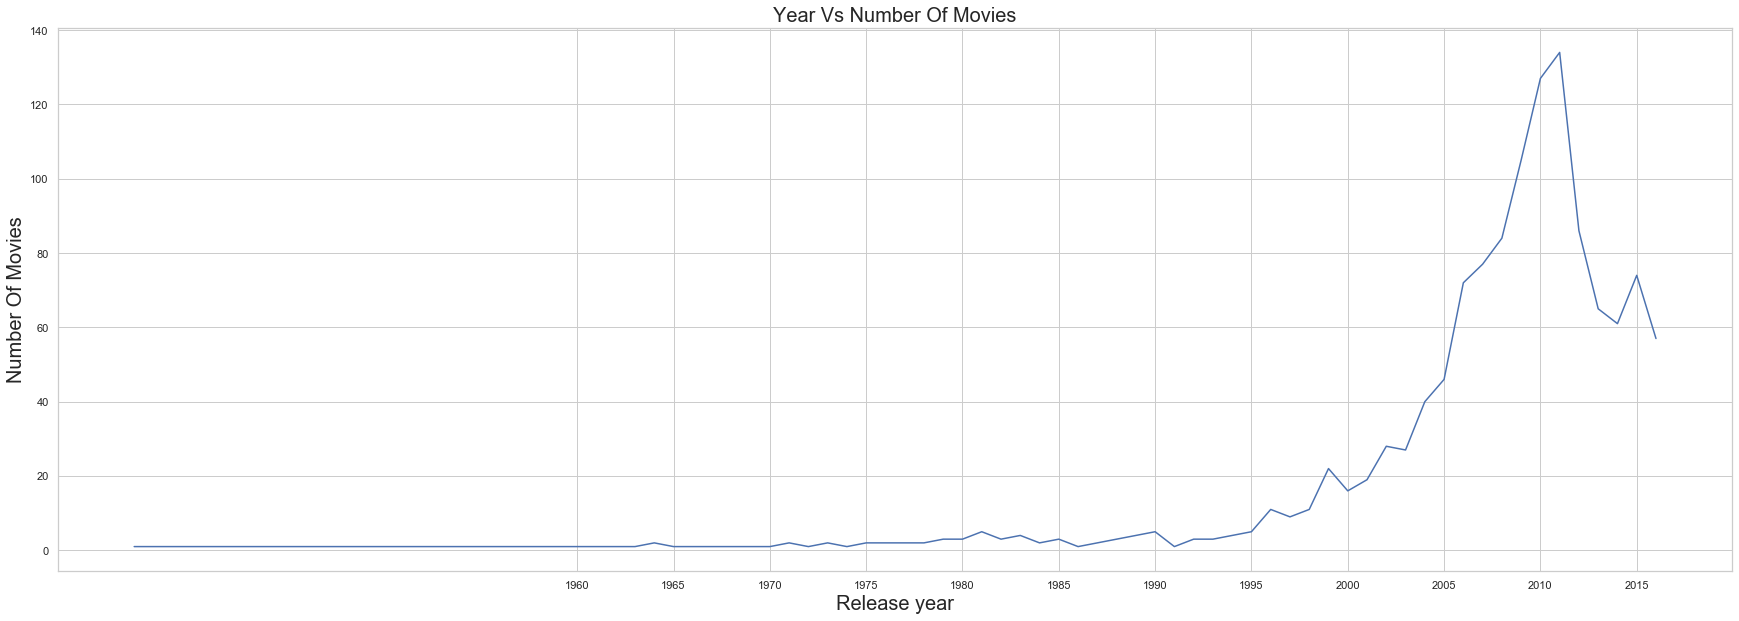

In [44]:

#make group of the data according to their release year and count the total number of movies in each year and pot.
df.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))

#set the figure size and labels
sns.set(rc={'figure.figsize':(30,10)})
plt.title("Year Vs Number Of Movies",fontsize = 20)
plt.xlabel('Release year',fontsize = 20)
plt.ylabel('Number Of Movies',fontsize = 20)
#set the style sheet
sns.set_style("whitegrid")

After Seeing the plot and the output we can conclude that year 2014 year has the highest release of movies (700) followed by year 2013 (659) and year 2015 (629).

In [45]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.



In [46]:
#calculate Profit for each of the movie
#add a new column in the dataframe name 'Profit'
df['Profit'] = df['revenue'] - df['budget']

In [47]:
#use the function 'idmin' to find the index of lowest profit movie.
#use the function 'idmax' to find the index of Highest profit movie.
#print the row related to this index.
def find_minmax(x):
    #use the function 'idmin' to find the index of lowest profit movie.
    min_index = df[x].idxmin()
    #use the function 'idmax' to find the index of Highest profit movie.
    high_index = df[x].idxmax()
    high = pd.DataFrame(df.loc[high_index,:])
    low = pd.DataFrame(df.loc[min_index,:])
    
    #print the movie with high and low profit
    print("Movie Which Has Highest "+ x + " : ",df['original_title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",df['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

#call the find_minmax function.
find_minmax('Profit')

Movie Which Has Highest Profit :  Avatar
Movie Which Has Lowest Profit  :  The Lone Ranger


,0,13
movie_id,19995,57201
title,Avatar,The Lone Ranger
profit_earned,2550965087,-165710090
cast,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""cast_id"": 4, ""character"": ""Tonto"", ""credit_..."
crew,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{""credit_id"": ""52fe4928c3a36847f818be95"", ""de..."
budget,237000000,255000000
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
homepage,http://www.avatarmovie.com/,http://disney.go.com/the-lone-ranger/
id,19995,57201
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 1556, ""name"": ""texas""}, {""id"": 2673, ""..."


The first column shows the highest profit made by a movie and second column shows the highest in loss movie in this dataset.

As we can see that 'Avatar' movie Directed by James Cameron earn the highest profit in all, making over 2.5B in profit in this dataset.And the most in loss movie in this dataset is The Warrior's Way. Going in loss by more than 400M was directed by Singmoo Lee.

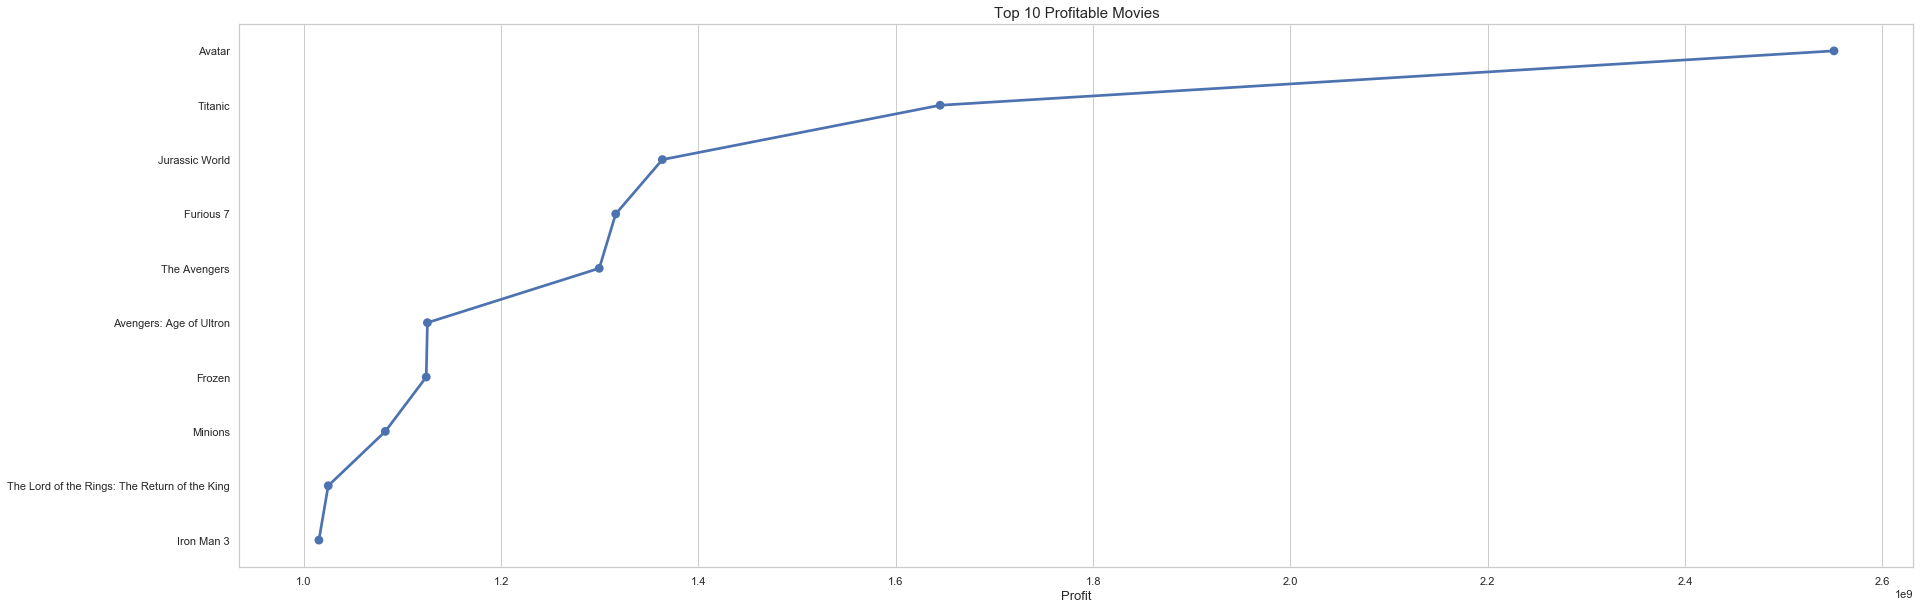

In [48]:
#make a plot which contain top 10 movies which earn highest profit.
#sort the 'Profit' column in decending order and store it in the new dataframe,
info = pd.DataFrame(df['Profit'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:10])
y = list(info['Profit'][:10])

#make a plot usinf pointplot for top 10 profitable movies.
ax = sns.pointplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(10,5)})
#setup the title and labels of the plot.
ax.set_title("Top 10 Profitable Movies",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 13)
sns.set_style("darkgrid")

__________
__________

__________
__________

### Research Question 2 : Movie with Highest And Lowest Budget?

In [49]:
#find the movie with highest and lowest budget.
#use 'find_minmax' function which i made earlier.
#make sure that movie with budget zero didn't affect the result.
#so change the zero into NAN in budget column.
df['budget'] = df['budget'].replace(0,np.NAN)
find_minmax('budget')

Movie Which Has Highest budget :  Pirates of the Caribbean: On Stranger Tides
Movie Which Has Lowest budget  :  Primer


,17,4802
movie_id,1865,14337
title,Pirates of the Caribbean: On Stranger Tides,Primer
profit_earned,665713802,417760
cast,"[{""cast_id"": 15, ""character"": ""Captain Jack Sp...","[{""cast_id"": 1, ""character"": ""Aaron"", ""credit_..."
crew,"[{""credit_id"": ""566b4f54c3a3683f56005151"", ""de...","[{""credit_id"": ""52fe45e79251416c75066791"", ""de..."
budget,380000000,7000
genres,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...","[{""id"": 878, ""name"": ""Science Fiction""}, {""id""..."
homepage,http://disney.go.com/pirates/index-on-stranger...,http://www.primermovie.com
id,1865,14337
keywords,"[{""id"": 658, ""name"": ""sea""}, {""id"": 1316, ""nam...","[{""id"": 1448, ""name"": ""distrust""}, {""id"": 2101..."


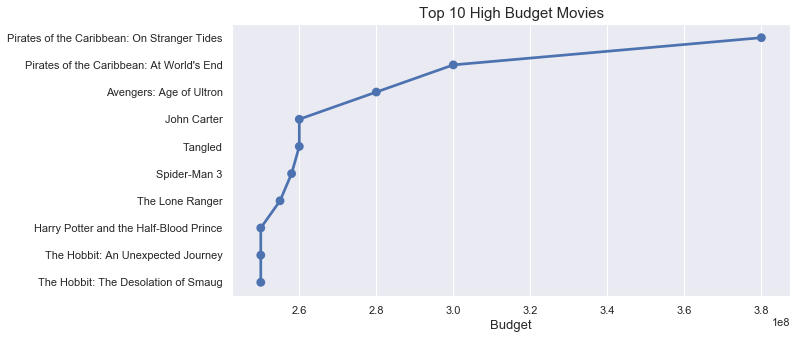

In [50]:
#make a plot which contain top 10 highest budget movies.
#sort the 'budget' column in decending order and store it in the new dataframe.
info = pd.DataFrame(df['budget'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 budget movies data from the list and dataframe.
x = list(data[:10])
y = list(info['budget'][:10])

#plot the figure and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 High Budget Movies",fontsize = 15)
ax.set_xlabel("Budget",fontsize = 13)
sns.set_style("darkgrid")

### Research Question 3  : Movies with longest and shortest runtime?

In [51]:
# we will call the same function **calculate(column)** again for this analysis
calculate('runtime')

,329,1626
movie_id,122,51162
title,The Lord of the Rings: The Return of the King,Winnie the Pooh
profit_earned,1024888979,-15540000
cast,"[{""cast_id"": 12, ""character"": ""Frodo Baggins"",...","[{""cast_id"": 1004, ""character"": ""Winnie the Po..."
crew,"[{""credit_id"": ""52fe421bc3a36847f80046c3"", ""de...","[{""credit_id"": ""5542d8a9925141586100090e"", ""de..."
budget,94000000,30000000
genres,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751..."
homepage,http://www.lordoftherings.net,http://disney.go.com/pooh/home/
id,122,51162
keywords,"[{""id"": 603, ""name"": ""elves""}, {""id"": 606, ""na...","[{""id"": 3905, ""name"": ""owl""}, {""id"": 4809, ""na..."


### Research Question 4 : Year of release vs Profitability

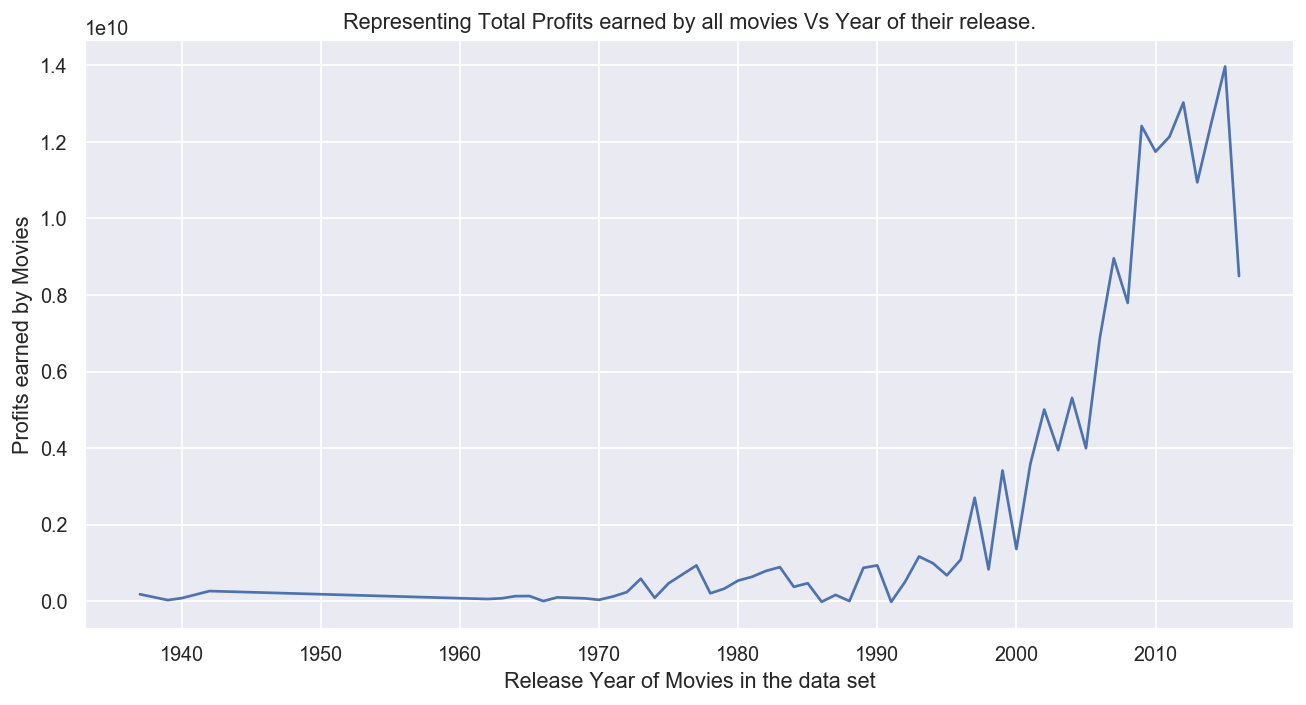

In [52]:
#We will be using Line plot for this analysis
#Since we want to know the profits of movies for every year therefore we have to sum up all the movies of a particular year

profits_year = df.groupby('release_year')['profit_earned'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 12)
#title of the line plot
plt.title('Representing Total Profits earned by all movies Vs Year of their release.')

#plotting the graph
plt.plot(profits_year)

#displaying the line plot
plt.show()

### Research Question 5 : Most Frequent Cast

In [63]:
#selecting the movies having profit $50M or more
profit_data = df[df['profit_earned'] >= 50000000]

#reindexing new data
profit_data.index = range(len(profit_data))

#we will start from 1 instead of 0
profit_data.index = profit_data.index + 1

#printing the changed dataset
profit_data.head(3)


#function which will take any column as argument from and keep its track 
def data(column):
    #will take a column, and separate the string by '|'
    data = profit_data[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    count = data.value_counts(ascending = False)
    
    return count


#variable to store the retured value
count = data('genres')
#printing top 5 values
count.head()

[{"id": 35, "name": "Comedy"}]                                                                             31
[{"id": 18, "name": "Drama"}]                                                                              26
[{"id": 12, "name": "Adventure"}, {"id": 28, "name": "Action"}, {"id": 53, "name": "Thriller"}]            22
[{"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]                                           17
[{"id": 12, "name": "Adventure"}, {"id": 28, "name": "Action"}, {"id": 878, "name": "Science Fiction"}]    11
dtype: int64

### Research Question 6: Duration of movies

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


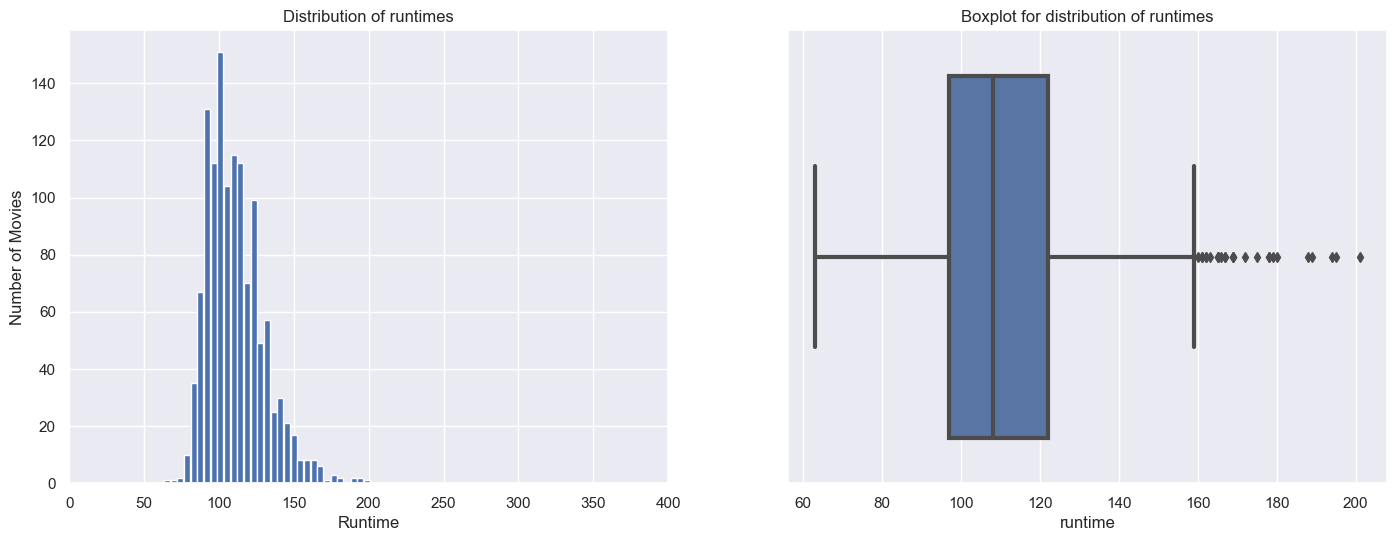

In [73]:
fig = plt.figure(figsize = (17,6),dpi = 100);
fig.add_subplot(1,2,1)
plt.hist(df['runtime'],bins = 31, rwidth = 0.9);
plt.xlabel('Runtime', fontsize = 12);
plt.ylabel('Number of Movies', fontsize = 12);
plt.title('Distribution of runtimes', fontsize = 12);
plt.xlim(0,400);

fig.add_subplot(1,2,2);
sns.boxplot(df['runtime'],linewidth = 3);
plt.title('Boxplot for distribution of runtimes', fontsize = 12);

As we can see generally movies with runtimes of 100mins are made the most.
But there are lot of outliers and we can even see some movies with a runtime of more than 700mins i.e. 11.66hrs.Have you ever seen such movie? I haven't.
Let's dig in more.
There can be one possibility which I can think of is they might not be movies but a series or something

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

This was an interesting data set. We came out with some informative facts about films. After this analysis we can conclude following:
        
        For a Movie to be in successful criteria:
        - Average Budget must be around 60 millon dollar
        - Average duration of the movie must be 113 minutes
        

*Limitations*: This analysis was done considering the movies which had a significant amount of profit of around 50 million dollar. This might not be completely error free but by following these suggestion one can increase the probability of a movie to become a hit. Moreover we are not sure if the data provided to us is completel corect and up-to-date. As mentioned before the budget and revenue column do not have currency unit, it might be possible different movies have budget in different currency according to the country they are produce in. So a disparity arises here which can state the complete analysis wrong. Dropping the rows with missing values also affected the overall analysis.